# Lab1: Gradient descent principles

**Carla Sendra Balcells**\
**Roxane Le Tensorer**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Gradient descent method
#### 1.1. A simple quadratic function

We first begin with creating a function which does the gradient descent.

In [51]:
def grad_desc_convex(x0, fig, alpha, iters):
    
    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    for k in range(iters):
        gradx = np.array([x0[0] * 2, x0[1] * 2])
        x0 = x0 - alpha * gradx
        fig.plot(*x0, 'r.')
    
    print("solution : %.3f, %.3f"%(x0[0],x0[1]))
    fig.plot(*x0, 'b+')
    return fig

Then, we create another function to do the entire algorithm : the only parameter is alpha, so that we could change it easily.

In [52]:
def algorithm1(alpha):
    fig = plt.figure(figsize=(20,5))

    num_plots = 3
    base = 100 + num_plots * 10

    for i in range(num_plots):
        ax = fig.add_subplot(base+(1+i))

        X = np.arange(-2, 2, 0.05)
        Y = np.arange(-2, 2, 0.05)
        X, Y = np.meshgrid(X, Y)

        Z = X**2 + Y**2 
        ax.contour(X, Y, Z, 50)

        gradx = 2 * X
        grady = 2 * Y 
        ax.streamplot(X, Y, gradx, grady)

        iters = 100

        x_lim = 3.5
        x = x_lim*np.random.random(2) - x_lim/2
        ax = grad_desc_convex(x, ax, alpha, iters)

    plt.show()

We can now try the algorithm with different values for alpha. <br>
We decided to choose three random x0.<br>
The initial point is represented with a black dot, each step is represented with a red dot, and the minimum is represented with a blue cross.<br>
We also decided to write the solution above the graphs. <br>
First, as suggested, we try with $\alpha$ = 0.1

solution : -0.000, -0.000
solution : -0.000, 0.000
solution : 0.000, 0.000


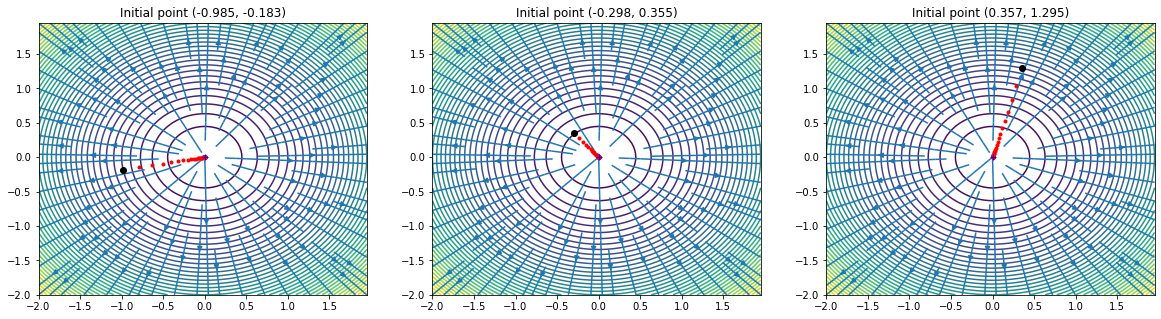

In [53]:
algorithm1(0.1)

We can see here that the algorithm a really efficient : in each of the three random x0, the result fits to the center, at least with a precision to the nearest thousandth. <br>

Now we can try with $\alpha \approx$ 1

solution : 0.761, 1.603
solution : -1.723, 1.740
solution : 1.230, -0.710


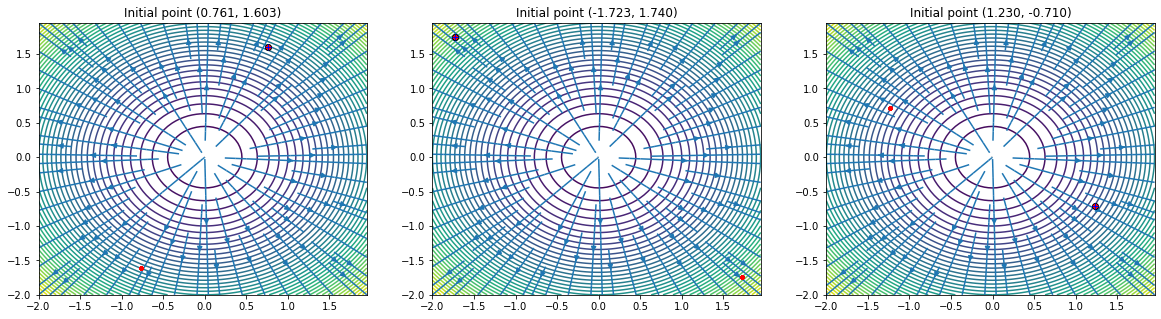

In [54]:
algorithm1(1)

This time, there seem to be a problem. This situation is very interesing, because the inverse of any gradient vectors in this case can be represented with a line whose middle is precisely the minimum of the fonction. That's the reason why, by having $\alpha$ = 1, the x is only going from one extremity of this line to the other, without having at any moment the possibility to reach the middle.<br>
We can now try with a value really close to 1 : 0.95

solution : 0.000, -0.000
solution : 0.000, -0.000
solution : 0.000, -0.000


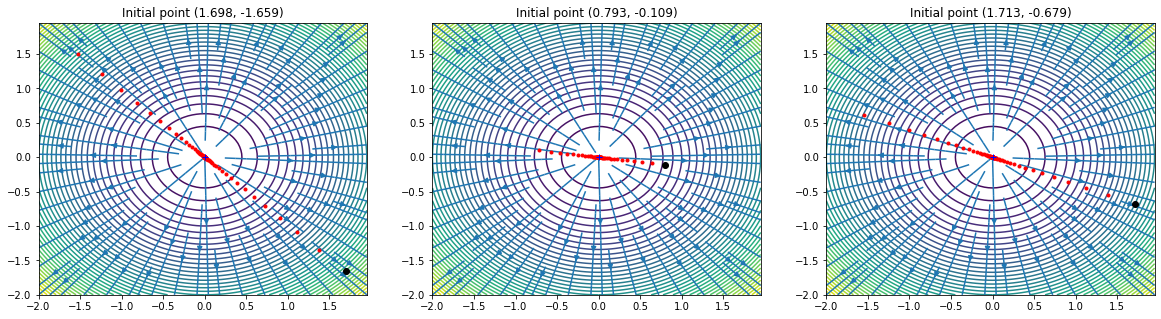

In [55]:
algorithm1(0.95)

In this situation, why can see that the algorithm achieves to reach the minimum, but this is very long because it always exceeds the solution and has to go back and forth, each time getting a little bit closer, until reaching the minimum.<br>
Finally, we can try this algorithm with $\alpha$ = 2 :

solution : 705732091168421551317557729105122457854364614656.000, 549823329712969757631287928071135891755798364160.000
solution : -760926699801428349768325659952591442177133903872.000, 681360412122937177601202366027871320612838309888.000
solution : -771986380732074382924500706850122287317845540864.000, -868056060795194451682278338297778753373577674752.000


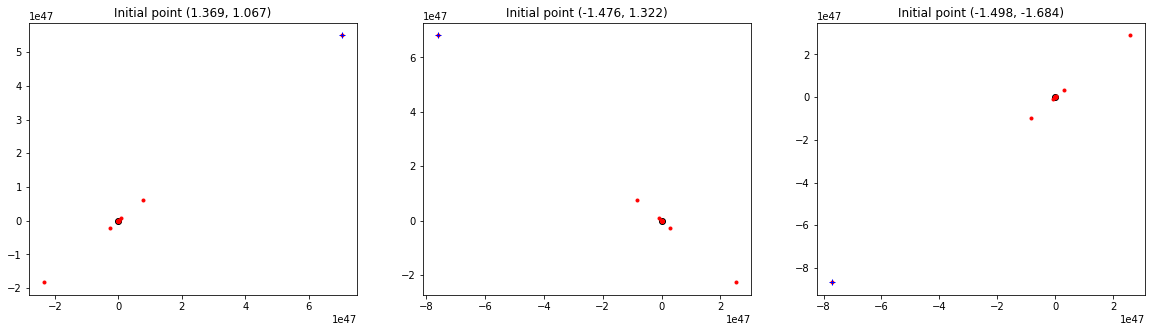

In [60]:
algorithm1(2)

As we could expect, with $\alpha$ > 1, it as totally impossible for the algorithm to reach the minimum, because it is always moving away from it. This is the reason why the result we obtain at the end has no sense. 

#### 1.2. A more complex function

In [6]:
def function(x):
    X=x[0]
    Y=x[1]
    return X**2 * (4 - 2.1*X**2 + X**4/3.0) + X*Y + Y**2*(-4+4*Y**2)
    

In [196]:
def grad_desc_non_convex(x0, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')

    for k in range(iters):
        gradx = np.array([2*x0[0]**5-8.4*x0[0]**3+8*x0[0]+x0[1], x0[0]+16*x0[1]**3-8*x0[1]])
        x0 = x0 - alpha * gradx
        fig.plot(*x0, 'r.')

    return fig


In [14]:
def grad_desc_non_convex_criterion(x, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x[0], x[1]))
    fig.plot(*x, 'ko')
    
    f0 = function(x)
    
    for i in range(iters):
        gradx = np.array([2*x[0]**5-8.4*x[0]**3+8*x[0]+x[1], x[0]+16*x[1]**3-8*x[1]])
        x1 = x - alpha * gradx
        f = function(x1)
        while (f>f0): 
            alpha = alpha/2
            x1 = x - alpha * gradx
            f = function(x1)
        f0=f    
        x=x1
        fig.plot(*x, 'r.')
        if(np.abs(f-f0) < 10e-3) & (np.linalg.norm(gradx) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            break
    fig.plot(*x, 'b+')
    
    return fig


a)

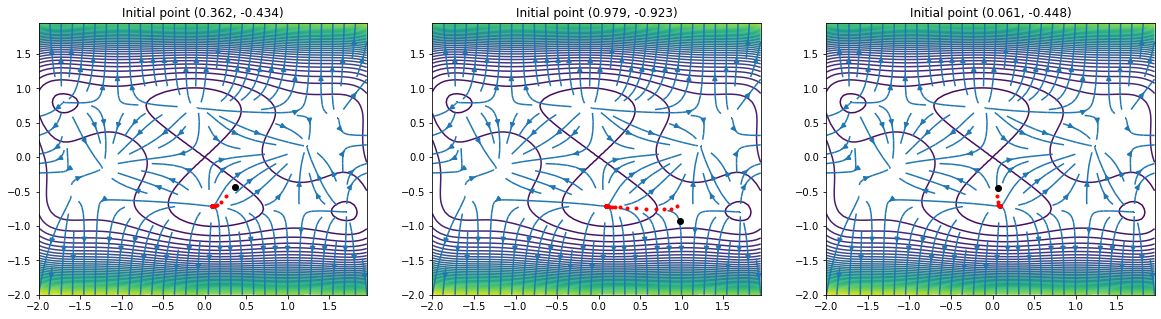

In [198]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    ax = fig.add_subplot(base+(1+i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = 2*X**5-8.4*X**3+8*X+Y
    grady = X+16*Y**3-8*Y
    ax.streamplot(X, Y, gradx, grady)
    
    iters = 100
    
    x_lim = 2.
    x = x_lim*np.random.random(2) - x_lim/2
    
    alpha = 0.05
    ax = grad_desc_non_convex(x, ax, alpha, k)

plt.show()

b)

number of points : 13
solution : 0.090, -0.713
number of points : 9
solution : -0.090, 0.713
number of points : 15
solution : -1.704, 0.796


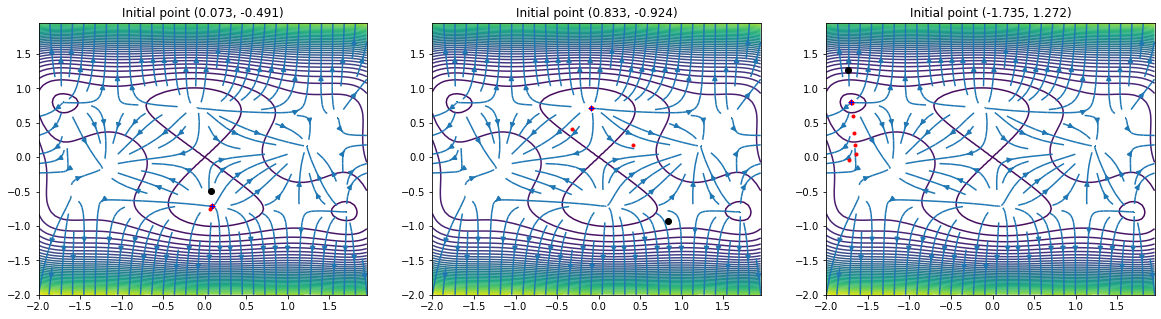

In [15]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots*10

for i in range(num_plots):
    ax = fig.add_subplot(base + (1 + i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = 2*X**5 - 8.4*X**3 + 8*X + Y
    grady = X + 16*Y**3 - 8*Y
    ax.streamplot(X, Y, gradx, grady)
    
    max_iters = 5000
    
    x_lim = 3.5
    x = x_lim*np.random.random(2) - x_lim/2
    alpha_init = 1
    ax = grad_desc_non_convex_criterion(x, ax, alpha_init, max_iters)

plt.show()

#### 1.3. The Rosenbrock function

In [8]:
def grad_desc_rosenbrock_criterion(x0, fig, alpha, num_iter, a, b):
    
    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    f0 = rosenbrock_function(x0)
    
    for i in range(num_iter):
        gradx = gradx = np.array([-2*(a-x0[0])-4*x0[0]*b*(x0[1]-x0[0]**2), 2*b*(x0[1]-x0[0]**2)])
        x = x0 - alpha * gradx
        f = rosenbrock_function(x)
        while (f>f0): 
            alpha = alpha/2
            x = x0 - alpha * gradx
            f = rosenbrock_function(x)

        fig.plot(*x, 'r.')
        if(np.abs(f-f0) < 10e-3) & (np.linalg.norm(gradx) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            fig.plot(*x, 'b+')
            break
        
        f0=f    
        x0=x

    return fig

In [9]:
def rosenbrock_function(x):
    X=x[0]
    Y=x[1]
    return (a-X)**2 + b*((Y-X**2)**2)
    

number of points : 9705
solution : 1.000, 1.000
number of points : 9747
solution : 1.000, 1.000
number of points : 9740
solution : 1.000, 1.000


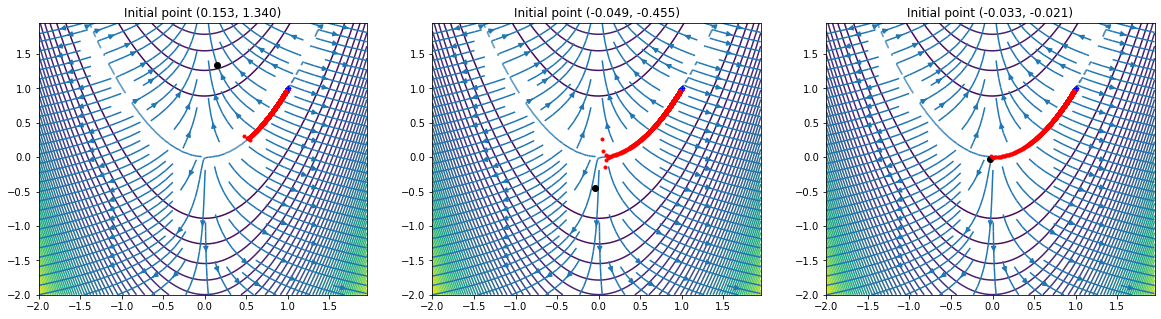

In [11]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots*10

a = 1
b = 100

for i in range(num_plots):
    ax = fig.add_subplot(base + (1 + i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = rosenbrock_function(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = -2*(a-X)-4*X*b*(Y-X**2)
    grady = 2*b*(Y-X**2)
    ax.streamplot(X, Y, gradx, grady)
    
    max_iters = 50000
    
    x_lim = 3.
    x = x_lim*np.random.random(2) - x_lim/2
    alpha_init = 1.
    ax = grad_desc_rosenbrock_criterion(x, ax, alpha_init, max_iters, a, b)
    

plt.show()